# Cleaning and Graphing 'living-planet-index.csv'

### Importing modules and csv data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("living-planet-index.csv", delimiter=";")
df

,Region,Year,Average Index,Upper Index,Lower Index
0,Africa,1970,100.000000,100.000000,100.000000
1,Africa,1971,95.461969,104.910803,87.790567
2,Africa,1972,94.683413,110.867839,81.479839
3,Africa,1973,99.181174,120.870721,81.908753
4,Africa,1974,99.384934,127.877780,77.144610
...,...,...,...,...,...
337,World,2014,31.669021,38.071988,26.383458
338,World,2015,31.627531,38.068720,26.281212
339,World,2016,31.145408,37.562137,25.770213
340,World,2017,30.885270,37.343040,25.465452


### Checking Basic Information

In [24]:
df.dtypes

Region            object
Year               int64
Average Index    float64
Upper Index      float64
Lower Index      float64
dtype: object

I also change the 'Year' column to an object to keep the formatting as YYYY.

In [25]:
df["Year"] = df["Year"].astype("object")
df.head()

,Region,Year,Average Index,Upper Index,Lower Index
0,Africa,1970,100.000000,100.000000,100.000000
1,Africa,1971,95.461969,104.910803,87.790567
2,Africa,1972,94.683413,110.867839,81.479839
3,Africa,1973,99.181174,120.870721,81.908753
4,Africa,1974,99.384934,127.877780,77.144610


Checking the year ranges per region. Africa is missing data.

In [27]:
grouped = df.groupby("Region")

for name, group_df in grouped:
    min_year = group_df["Year"].min()
    max_year = group_df["Year"].max()
    print("{} : {}-{}".format(name, min_year, max_year))

Africa : 1970-2017
Asia and Pacific : 1970-2018
Europe and Central Asia : 1970-2018
Freshwater : 1970-2018
Latin America and the Caribbean : 1970-2018
North America : 1970-2018
World : 1970-2018


Here I am concatinating data for the year 2018 in Africa, as that row was missing from the dataframe

In [28]:
africa2 = pd.DataFrame(
    {
        "Region": "Africa",
        "Year": 2018,
        "Average Index": 34.445875,
        "Upper Index": 73.433580,
        "Lower Index": 15.991854,
    },
    index=[48],
)
df = pd.concat([df.iloc[:48], africa2, df.iloc[48:]]).reset_index()

df = df.drop(axis=1, columns="index")

In [29]:
df.describe()

,Year,Average Index,Upper Index,Lower Index
count,343.000000,343.000000,343.000000,343.000000
mean,1994.000000,67.282340,86.476023,53.949572
std,14.162796,30.565883,33.694054,29.675512
min,1970.000000,6.413632,11.390088,3.702799
25%,1982.000000,43.001867,64.103290,27.237455
50%,1994.000000,70.793945,95.954016,53.673369
75%,2006.000000,92.759890,108.288317,78.816935
max,2018.000000,130.741073,152.570576,112.142994


In [30]:
region = df["Region"]
pd.unique(region)

array(['Africa', 'Asia and Pacific', 'Europe and Central Asia',
       'Freshwater', 'Latin America and the Caribbean', 'North America',
       'World'], dtype=object)

### Grouping Function

Here I made a function that divides the 'Region' column into groups by region name and saves each group to a variable. This will help me graph the data later.

In [31]:
def save_groupby(df):
    grouped = df.groupby("Region")
    groups = []
    for _, group in grouped:
        groups.append(group)
    return tuple(groups)


africa, asia, euro, fresh, latin, nam, world = save_groupby(df)

Testing the function by calling a group.

In [32]:
africa.tail()

,Region,Year,Average Index,Upper Index,Lower Index
44,Africa,2014,32.492869,68.628636,15.238575
45,Africa,2015,31.293573,66.256152,14.669147
46,Africa,2016,32.054221,68.026893,14.968882
47,Africa,2017,34.445875,73.433580,15.991854
48,Africa,2018,34.445875,73.433580,15.991854


Saving the wrangled data as an Excel spreadsheet to use on my streamlit code.

In [33]:
df.to_excel("living-planet-spread.xlsx")

### Minimum, Maximum, and Mean Averages by Region

I create a function to return these averages by region.

In [34]:
def stats(df, col_name):
    for name, group in grouped:
        av_col = group[col_name]
        min_av = av_col.min()
        mean = av_col.mean()
        max_av = av_col.max()
        print("{} : Min - {} | Mean - {} | Max - {}".format(name, min_av, mean, max_av))


print(stats(df, "Average Index"))

Africa : Min - 31.2935728 | Mean - 59.11652187291667 | Max - 100.0
Asia and Pacific : Min - 43.9966301 | Mean - 76.62235177755102 | Max - 106.0154597
Europe and Central Asia : Min - 82.2915342 | Mean - 108.34827702244897 | Max - 130.7410732
Freshwater : Min - 17.1441894 | Mean - 47.68026474693878 | Max - 100.0
Latin America and the Caribbean : Min - 6.4136321 | Mean - 37.97101597346939 | Max - 101.0071636
North America : Min - 70.2641731 | Mean - 82.19552640816326 | Max - 100.0
World : Min - 30.8852702 | Mean - 59.54590406734694 | Max - 100.0
None


I also identify the region with the lowest biodiversity score.

In [35]:
df["Average Index"].idxmin()

244

In [36]:
df.loc[243, :]

Region           Latin America and the Caribbean
Year                                        2017
Average Index                           6.855036
Upper Index                            11.918571
Lower Index                             4.033493
Name: 243, dtype: object

### Graphing the Data

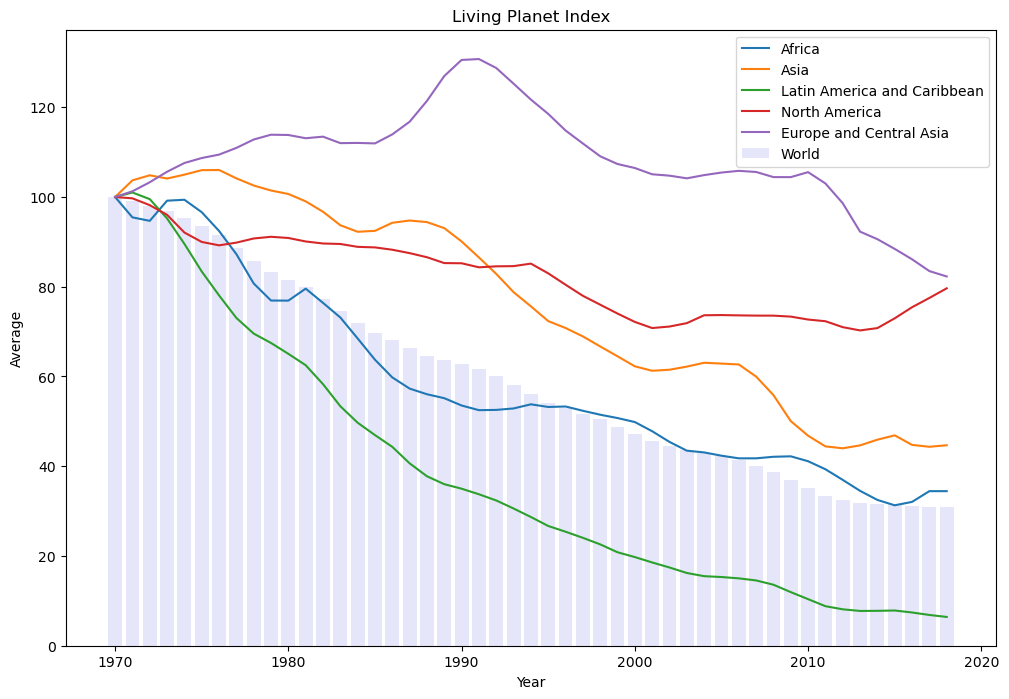

In [39]:
plt.figure(figsize=(12, 8))
plt.title("Living Planet Index")
plt.xlabel("Year")
plt.ylabel("Average")
plt.plot(africa["Year"], africa["Average Index"])
plt.plot(asia["Year"], asia["Average Index"])
plt.plot(latin["Year"], latin["Average Index"])
plt.plot(nam["Year"], nam["Average Index"])
plt.plot(euro["Year"], euro["Average Index"])
plt.bar(world["Year"], world["Average Index"], color="lavender")
plt.legend(
    [
        "Africa",
        "Asia",
        "Latin America and Caribbean",
        "North America",
        "Europe and Central Asia",
        "World",
    ]
)